In [5]:
import numpy as np
import pandas as pd 

from sklearn.preprocessing import LabelEncoder
import os

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

from src.fonctions.fonctions_features import one_hot_encoder, agg_numeric_and_cat 

In [6]:
fichier_principal = pd.read_csv("data/application_train.csv")
fichier_test = pd.read_csv("data/application_test.csv")
hist_prec_autre_banques = pd.read_csv("data/bureau.csv")
hist_credit_autres = pd.read_csv("data/bureau_balance.csv")
hist_demandes = pd.read_csv("data/previous_application.csv")
pret_home_credit = pd.read_csv("data/POS_CASH_balance.csv")
anciennes_cartes = pd.read_csv("data/credit_card_balance.csv")
hist_paiement_carte = pd.read_csv("data/installments_payments.csv")


In [7]:
print(fichier_principal.info())
print("----------------------------------------------")
print("----------------------------------------------")
print(hist_prec_autre_banques.info())
print("----------------------------------------------")
print("----------------------------------------------")
print(hist_credit_autres.info())
print("----------------------------------------------")
print("----------------------------------------------")
print(hist_demandes.info())
print("----------------------------------------------")
print("----------------------------------------------")
print(pret_home_credit.info())
print("----------------------------------------------")
print("----------------------------------------------")
print(anciennes_cartes.info())
print("----------------------------------------------")
print("----------------------------------------------")
print(hist_paiement_carte.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None
----------------------------------------------
----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERD

In [8]:
print('Training data shape: ', fichier_principal.shape)

fichier_principal.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
for col in fichier_principal.columns:
    print(f"### Colonne : {col}\n")
    
    # Nombre et pourcentage de NaN
    n_missing = fichier_principal[col].isna().sum()
    pct_missing = n_missing / len(fichier_principal) * 100
    print(f"Valeurs manquantes (NaN) : {n_missing} ({pct_missing:.2f}%)\n")
        
    if fichier_principal[col].dtype == "object" or str(fichier_principal[col].dtype) == "category":
        print("Variable qualitative\n")
        print(fichier_principal[col].value_counts(dropna=False))
    else:
        print("Variable quantitative\n")
        print(fichier_principal[col].describe())
        
    print("\n" + "-"*50 + "\n")


### Colonne : SK_ID_CURR

Valeurs manquantes (NaN) : 0 (0.00%)

Variable quantitative

count    307511.000000
mean     278180.518577
std      102790.175348
min      100002.000000
25%      189145.500000
50%      278202.000000
75%      367142.500000
max      456255.000000
Name: SK_ID_CURR, dtype: float64

--------------------------------------------------

### Colonne : TARGET

Valeurs manquantes (NaN) : 0 (0.00%)

Variable quantitative

count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64

--------------------------------------------------

### Colonne : NAME_CONTRACT_TYPE

Valeurs manquantes (NaN) : 0 (0.00%)

Variable qualitative

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64

--------------------------------------------------

### Colonne : CODE_GENDER

Valeurs manquantes (NaN

In [10]:
print('Testing data shape: ', fichier_test.shape)
fichier_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
fichier_principal['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

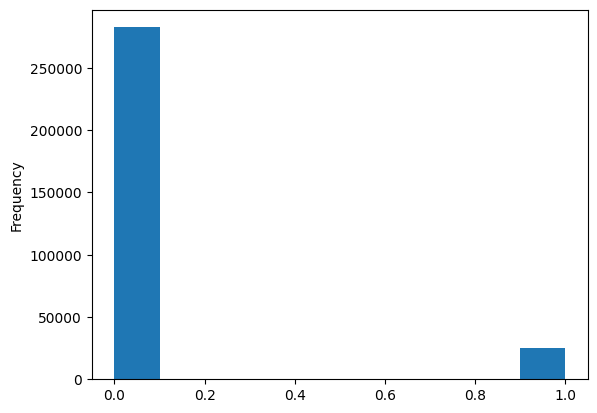

In [12]:
fichier_principal['TARGET'].astype(int).plot.hist()

In [13]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [14]:
# Missing values statistics
missing_values = missing_values_table(fichier_principal)
missing_values.head(30)


Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_MODE,214865,69.9
COMMONAREA_AVG,214865,69.9
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_AVG,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_MODE,210199,68.4


In [15]:
fichier_principal.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

In [16]:
fichier_principal.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [17]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in fichier_principal:
    if fichier_principal[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(fichier_principal[col].unique())) <= 2:
            # Train on the training data
            le.fit(fichier_principal[col])
            # Transform both training and testing data
            fichier_principal[col] = le.transform(fichier_principal[col])
            fichier_test[col] = le.transform(fichier_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [18]:
# one-hot encoding of categorical variables
fichier_principal = pd.get_dummies(fichier_principal)
fichier_test = pd.get_dummies(fichier_test)

print('Training Features shape: ', fichier_principal.shape)
print('Testing Features shape: ', fichier_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


In [19]:
train_labels = fichier_principal['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
fichier_principal, fichier_test = fichier_principal.align(fichier_test, join = 'inner', axis = 1)

# Add the target back in
fichier_principal['TARGET'] = train_labels

print('Training Features shape: ', fichier_principal.shape)
print('Testing Features shape: ', fichier_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


In [20]:
(fichier_principal['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [21]:
fichier_principal['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Text(0.5, 0, 'Days Employment')

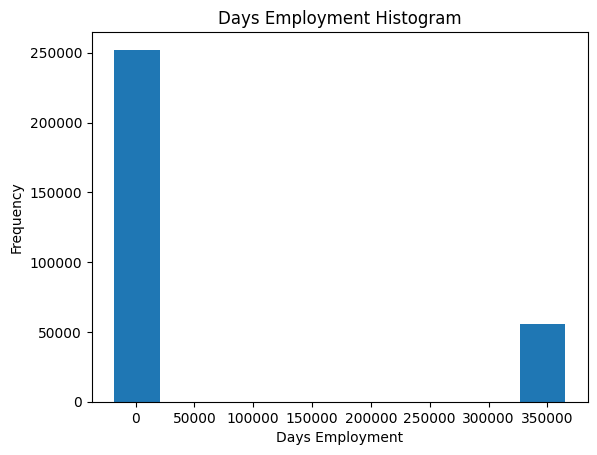

In [22]:
fichier_principal['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment')


In [23]:
anom = fichier_principal[fichier_principal['DAYS_EMPLOYED'] == 365243]
non_anom = fichier_principal[fichier_principal['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))


The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


Text(0.5, 0, 'Days Employment')

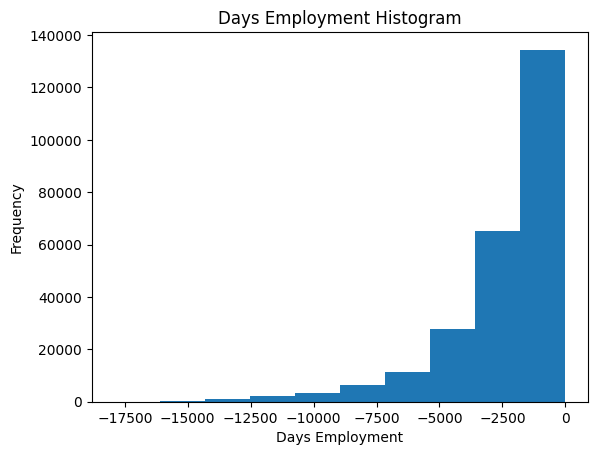

In [24]:
# Create an anomalous flag column
fichier_principal['DAYS_EMPLOYED_ANOM'] = fichier_principal["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
fichier_principal['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

fichier_principal['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')
plt.xlabel('Days Employment')

In [25]:
fichier_test['DAYS_EMPLOYED_ANOM'] = fichier_test["DAYS_EMPLOYED"] == 365243
fichier_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (fichier_test["DAYS_EMPLOYED_ANOM"].sum(), len(fichier_test)))


There are 9274 anomalies in the test data out of 48744 entries


In [26]:
# Find correlations with the target and sort
correlations = fichier_principal.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

In [27]:
# Find the correlation of the positive days since birth and target
fichier_principal['DAYS_BIRTH'] = abs(fichier_principal['DAYS_BIRTH'])
fichier_principal['DAYS_BIRTH'].corr(fichier_principal['TARGET'])


np.float64(-0.07823930830982709)

Text(0, 0.5, 'Count')

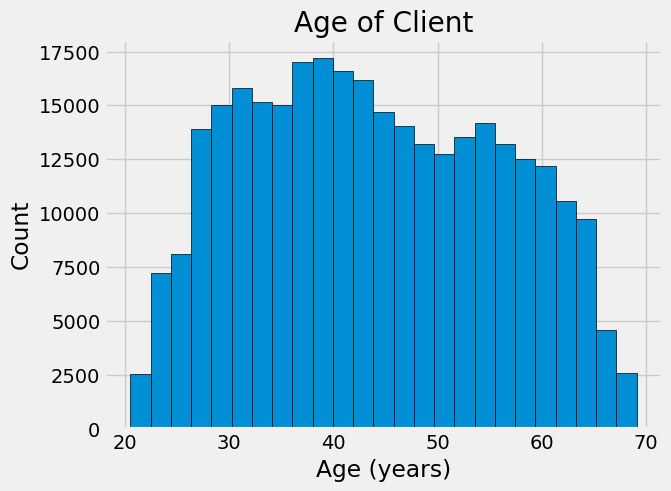

In [28]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(fichier_principal['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count')

Text(0.5, 1.0, 'Distribution of Ages')

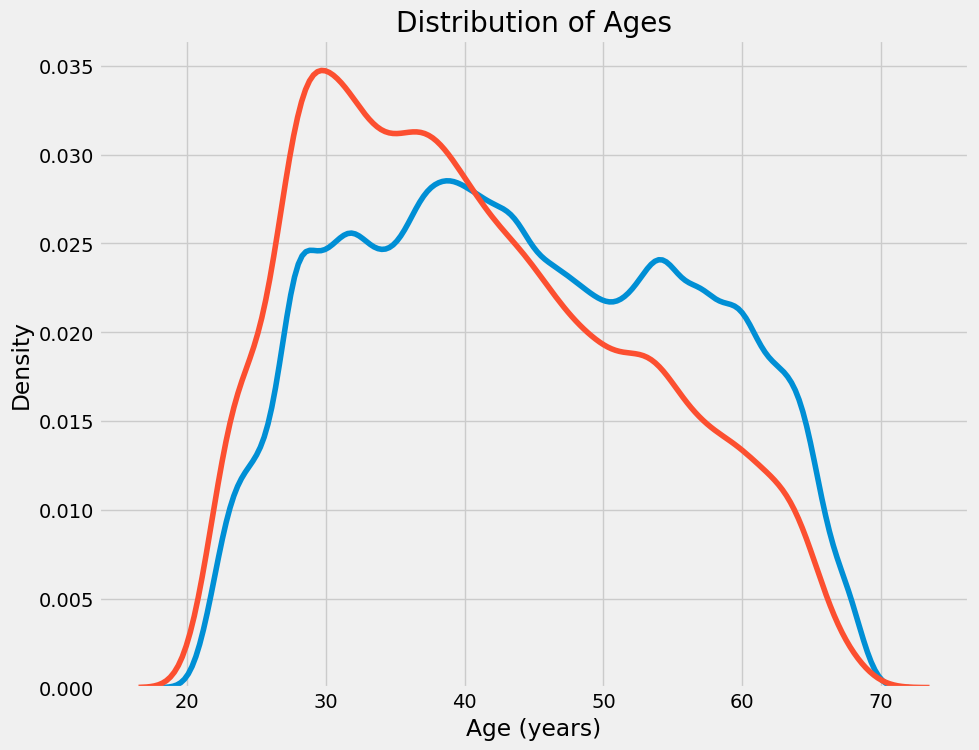

In [29]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(fichier_principal.loc[fichier_principal['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(fichier_principal.loc[fichier_principal['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages')

In [30]:
# Age information into a separate dataframe
age_data = fichier_principal[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)



,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [31]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


Text(0.5, 1.0, 'Failure to Repay by Age Group')

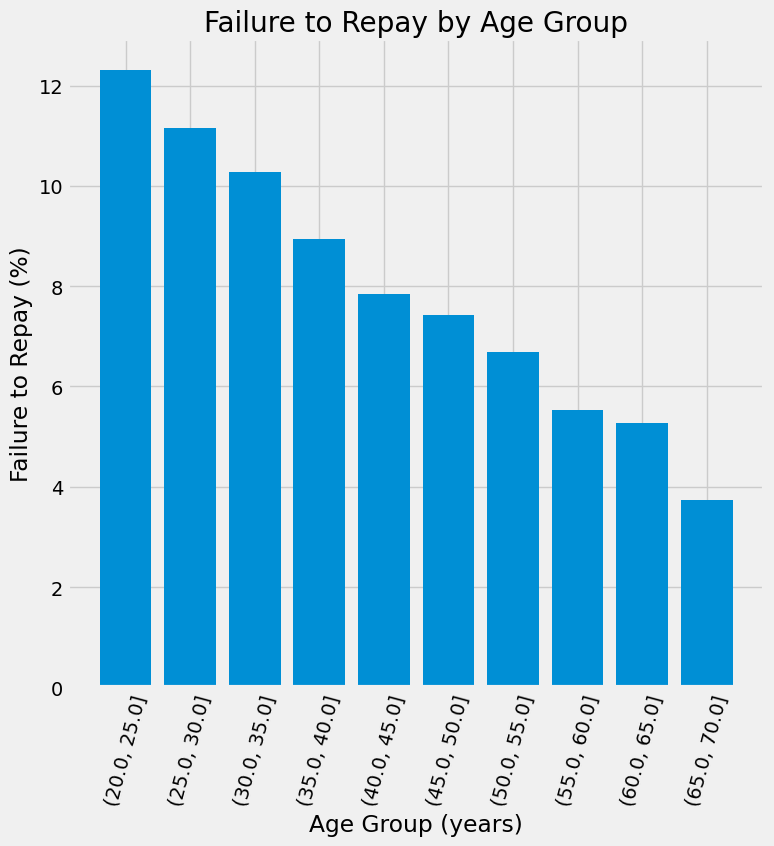

In [32]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group')

In [33]:
ext_data = fichier_principal[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

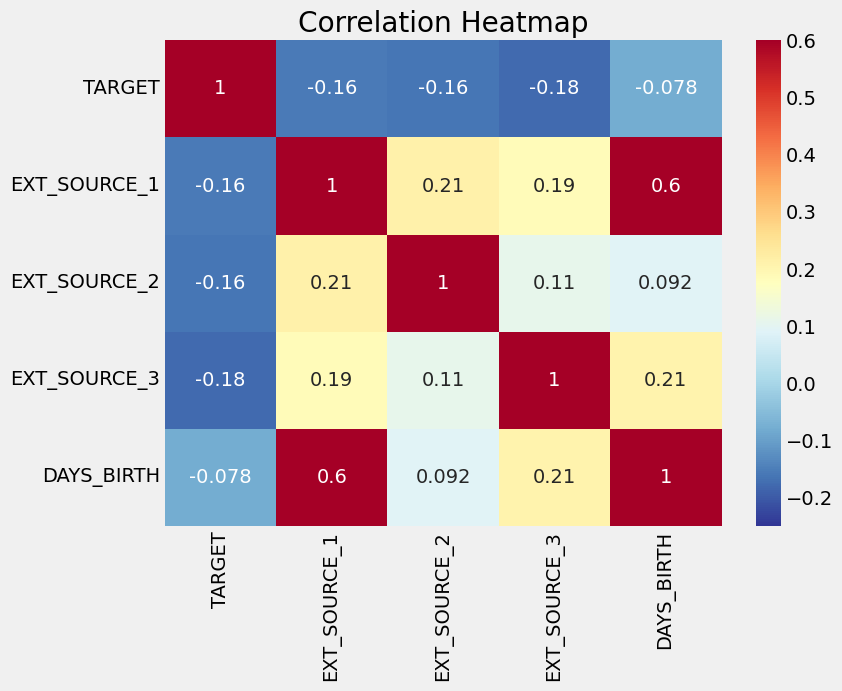

In [34]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap')



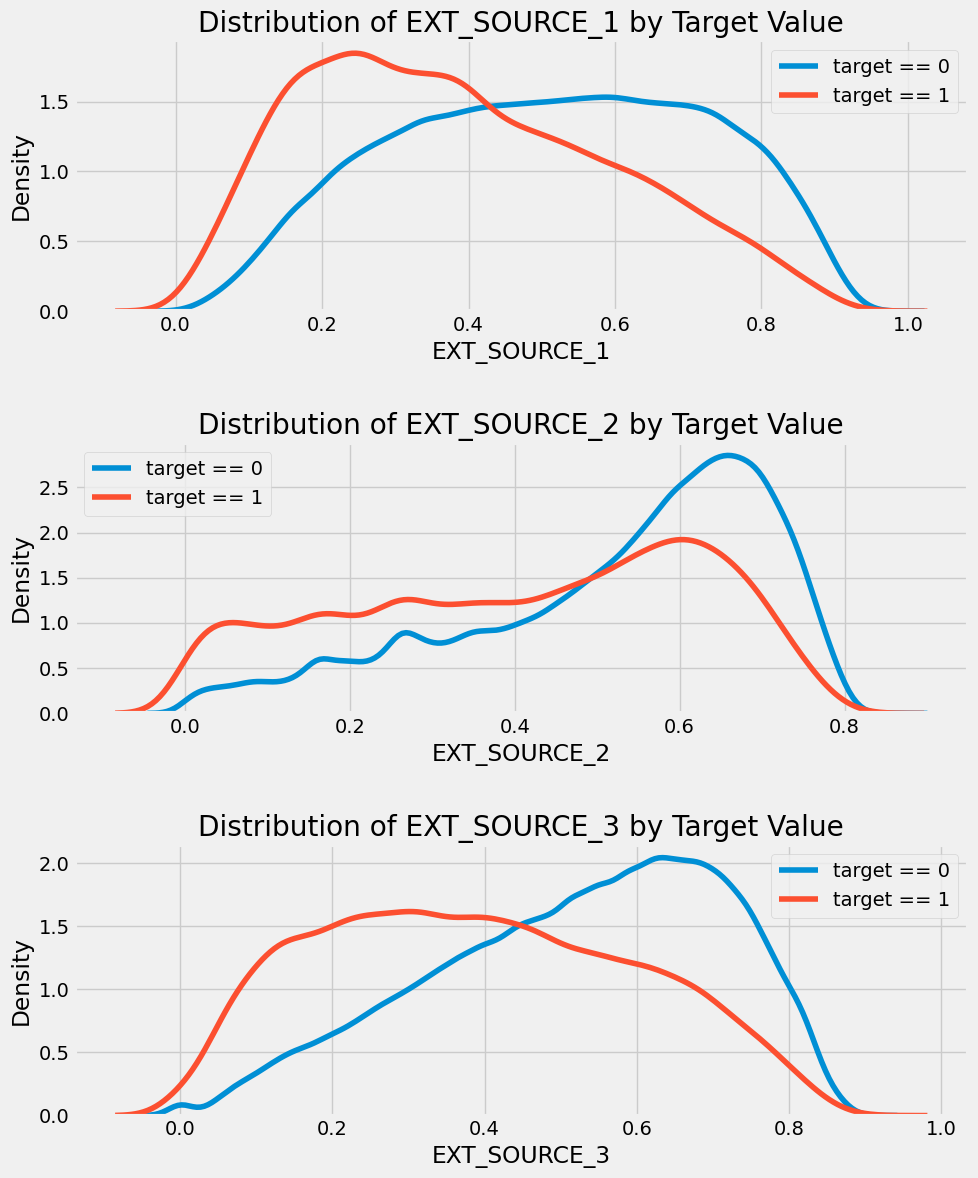

In [36]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(
        fichier_principal.loc[fichier_principal['TARGET'] == 0, source],
        label='target == 0'
    )
    # plot loans that were not repaid
    sns.kdeplot(
        fichier_principal.loc[fichier_principal['TARGET'] == 1, source],
        label='target == 1'
    )
    
    # afficher la légende pour ce subplot
    plt.legend()

    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source)
    plt.ylabel('Density')
    
plt.tight_layout(h_pad = 2.5)


In [37]:
# correlation_plot.py
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


DATA_PATH = Path("data/application_train.csv")  # fichier_principal
OUTPUT_PATH = Path("outputs/correlation_heatmap.png")
ROW_LIMIT = None  # mettez un entier (ex: 60000) si vous voulez limiter les lignes pour économiser de la RAM


def load_main_dataframe(path: Path, row_limit: int | None = None) -> pd.DataFrame:
    kwargs = {"nrows": row_limit} if row_limit else {}
    return pd.read_csv(path, **kwargs)


def plot_correlation(df: pd.DataFrame, out_path: Path) -> None:
    numeric_df = df.select_dtypes(include="number")
    corr = numeric_df.corr()

    mask = np.triu(np.ones_like(corr, dtype=bool))
    plt.figure(figsize=(14, 12))
    sns.heatmap(
        corr,
        mask=mask,
        cmap="vlag",
        center=0,
        vmin=-1,
        vmax=1,
        square=True,
        linewidths=0.5,
        cbar_kws={"shrink": 0.6},
    )
    plt.title("Corrélation des features numériques – application_train")
    plt.tight_layout()
    out_path.parent.mkdir(parents=True, exist_ok=True)
    plt.savefig(out_path, dpi=200)
    plt.close()


def main() -> None:
    df = load_main_dataframe(DATA_PATH, ROW_LIMIT)
    plot_correlation(df, OUTPUT_PATH)
    print(f"Heatmap enregistrée sous : {OUTPUT_PATH}")


if __name__ == "__main__":
    main()


Heatmap enregistrée sous : outputs\correlation_heatmap.png


In [38]:
# === Features simples "domain" sur la table principale ===

# On s'assure que l'âge est en valeur absolue 
fichier_principal["DAYS_BIRTH"] = fichier_principal["DAYS_BIRTH"].abs()
fichier_test["DAYS_BIRTH"] = fichier_test["DAYS_BIRTH"].abs()

# Proportion de la vie passée à travailler
fichier_principal["DAYS_EMPLOYED_PERC"] = (
    fichier_principal["DAYS_EMPLOYED"] / fichier_principal["DAYS_BIRTH"]
)
fichier_test["DAYS_EMPLOYED_PERC"] = (
    fichier_test["DAYS_EMPLOYED"] / fichier_test["DAYS_BIRTH"]
)

# Revenu par rapport au crédit demandé
fichier_principal["INCOME_CREDIT_PERC"] = (
    fichier_principal["AMT_INCOME_TOTAL"] / fichier_principal["AMT_CREDIT"]
)
fichier_test["INCOME_CREDIT_PERC"] = (
    fichier_test["AMT_INCOME_TOTAL"] / fichier_test["AMT_CREDIT"]
)

# Revenu par personne dans le foyer
fichier_principal["INCOME_PER_PERSON"] = (
    fichier_principal["AMT_INCOME_TOTAL"] / fichier_principal["CNT_FAM_MEMBERS"]
)
fichier_test["INCOME_PER_PERSON"] = (
    fichier_test["AMT_INCOME_TOTAL"] / fichier_test["CNT_FAM_MEMBERS"]
)

# Poids de l'annuité dans le revenu
fichier_principal["ANNUITY_INCOME_PERC"] = (
    fichier_principal["AMT_ANNUITY"] / fichier_principal["AMT_INCOME_TOTAL"]
)
fichier_test["ANNUITY_INCOME_PERC"] = (
    fichier_test["AMT_ANNUITY"] / fichier_test["AMT_INCOME_TOTAL"]
)

# Taux de remboursement implicite
fichier_principal["PAYMENT_RATE"] = (
    fichier_principal["AMT_ANNUITY"] / fichier_principal["AMT_CREDIT"]
)
fichier_test["PAYMENT_RATE"] = (
    fichier_test["AMT_ANNUITY"] / fichier_test["AMT_CREDIT"]
)

print("Shape train avec features simples :", fichier_principal.shape)
print("Shape test  avec features simples :", fichier_test.shape)


Shape train avec features simples : (307511, 246)
Shape test  avec features simples : (48744, 245)


In [39]:
# === Agrégations BUREAU + BUREAU_BALANCE ===

# 1) Agrégation de bureau_balance (hist_credit_autres) par SK_ID_BUREAU
bb = hist_credit_autres.copy()
print("bureau_balance shape :", bb.shape)

bb_agg = agg_numeric_and_cat(bb, key="SK_ID_BUREAU", prefix="BB_")
print("BB agrégé par SK_ID_BUREAU :", bb_agg.shape)

# 2) Merge dans bureau (hist_prec_autre_banques)
bureau = hist_prec_autre_banques.copy()
bureau = bureau.merge(bb_agg, on="SK_ID_BUREAU", how="left")
print("bureau + BB :", bureau.shape)

# 3) Agrégation finale de bureau par SK_ID_CURR
bureau_agg = agg_numeric_and_cat(bureau, key="SK_ID_CURR", prefix="BUREAU_")
print("BUREAU agrégé par SK_ID_CURR :", bureau_agg.shape)

# 4) Merge sur le train et le test
fichier_principal = fichier_principal.merge(bureau_agg, on="SK_ID_CURR", how="left")
fichier_test       = fichier_test.merge(bureau_agg, on="SK_ID_CURR", how="left")

print("Train après BUREAU :", fichier_principal.shape)
print("Test  après BUREAU :", fichier_test.shape)


bureau_balance shape : (27299925, 3)
BB agrégé par SK_ID_BUREAU : (817395, 15)
bureau + BB : (1716428, 31)
BUREAU agrégé par SK_ID_CURR : (305811, 162)
Train après BUREAU : (307511, 407)
Test  après BUREAU : (48744, 406)


In [40]:
# === Agrégations PREVIOUS_APPLICATION ===

prev = hist_demandes.copy()
print("previous_application shape :", prev.shape)

prev_agg = agg_numeric_and_cat(prev, key="SK_ID_CURR", prefix="PREV_")
print("PREV agrégé par SK_ID_CURR :", prev_agg.shape)

fichier_principal = fichier_principal.merge(prev_agg, on="SK_ID_CURR", how="left")
fichier_test       = fichier_test.merge(prev_agg, on="SK_ID_CURR", how="left")

print("Train après PREV :", fichier_principal.shape)
print("Test  après PREV :", fichier_test.shape)


previous_application shape : (1670214, 37)
PREV agrégé par SK_ID_CURR : (338857, 260)
Train après PREV : (307511, 666)
Test  après PREV : (48744, 665)


In [41]:
# === Agrégations POS_CASH_BALANCE ===

pos = pret_home_credit.copy()
print("POS_CASH_balance shape :", pos.shape)

pos_agg = agg_numeric_and_cat(pos, key="SK_ID_CURR", prefix="POS_")
print("POS agrégé par SK_ID_CURR :", pos_agg.shape)

fichier_principal = fichier_principal.merge(pos_agg, on="SK_ID_CURR", how="left")
fichier_test       = fichier_test.merge(pos_agg, on="SK_ID_CURR", how="left")

print("Train après POS :", fichier_principal.shape)
print("Test  après POS :", fichier_test.shape)


POS_CASH_balance shape : (10001358, 8)
POS agrégé par SK_ID_CURR : (337252, 41)
Train après POS : (307511, 706)
Test  après POS : (48744, 705)


In [42]:
# === Agrégations CREDIT_CARD_BALANCE ===

ccb = anciennes_cartes.copy()
print("credit_card_balance shape :", ccb.shape)

ccb_agg = agg_numeric_and_cat(ccb, key="SK_ID_CURR", prefix="CCB_")
print("CCB agrégé par SK_ID_CURR :", ccb_agg.shape)

fichier_principal = fichier_principal.merge(ccb_agg, on="SK_ID_CURR", how="left")
fichier_test       = fichier_test.merge(ccb_agg, on="SK_ID_CURR", how="left")

print("Train après CCB :", fichier_principal.shape)
print("Test  après CCB :", fichier_test.shape)


credit_card_balance shape : (3840312, 23)
CCB agrégé par SK_ID_CURR : (103558, 114)
Train après CCB : (307511, 819)
Test  après CCB : (48744, 818)


In [43]:
# === Agrégations INSTALLMENTS_PAYMENTS ===

inst = hist_paiement_carte.copy()
print("installments_payments shape :", inst.shape)

inst_agg = agg_numeric_and_cat(inst, key="SK_ID_CURR", prefix="INST_")
print("INST agrégé par SK_ID_CURR :", inst_agg.shape)

fichier_principal = fichier_principal.merge(inst_agg, on="SK_ID_CURR", how="left")
fichier_test       = fichier_test.merge(inst_agg, on="SK_ID_CURR", how="left")

print("Train après INST :", fichier_principal.shape)
print("Test  après INST :", fichier_test.shape)


installments_payments shape : (13605401, 8)
INST agrégé par SK_ID_CURR : (339587, 36)
Train après INST : (307511, 854)
Test  après INST : (48744, 853)


In [45]:
# Train
print("Lignes train      :", len(fichier_principal))
print("SK_ID_CURR uniques:", fichier_principal["SK_ID_CURR"].nunique())
print("Doublons SK_ID_CURR train :", fichier_principal["SK_ID_CURR"].duplicated().sum())

# Test
print("Lignes test       :", len(fichier_test))
print("SK_ID_CURR uniques:", fichier_test["SK_ID_CURR"].nunique())
print("Doublons SK_ID_CURR test  :", fichier_test["SK_ID_CURR"].duplicated().sum())


Lignes train      : 307511
SK_ID_CURR uniques: 307511
Doublons SK_ID_CURR train : 0
Lignes test       : 48744
SK_ID_CURR uniques: 48744
Doublons SK_ID_CURR test  : 0


In [46]:
print("NaN SK_ID_CURR train :", fichier_principal["SK_ID_CURR"].isna().sum())
print("NaN TARGET train     :", fichier_principal["TARGET"].isna().sum())

NaN SK_ID_CURR train : 0
NaN TARGET train     : 0


In [47]:
cols_all_nan = fichier_principal.columns[fichier_principal.isna().all()]
print("Colonnes 100% NaN :", len(cols_all_nan))
print(list(cols_all_nan)[:20])  # pour en voir un échantillon


Colonnes 100% NaN : 0
[]


In [48]:
na_ratio = fichier_principal.isna().mean().sort_values(ascending=False)
na_ratio.head(20)


PREV_RATE_INTEREST_PRIMARY_VAR        0.999434
PREV_RATE_INTEREST_PRIVILEGED_VAR     0.999434
PREV_RATE_INTEREST_PRIVILEGED_MIN     0.985012
PREV_RATE_INTEREST_PRIMARY_MEAN       0.985012
PREV_RATE_INTEREST_PRIMARY_MIN        0.985012
PREV_RATE_INTEREST_PRIVILEGED_MAX     0.985012
PREV_RATE_INTEREST_PRIVILEGED_MEAN    0.985012
PREV_RATE_INTEREST_PRIMARY_MAX        0.985012
CCB_AMT_PAYMENT_CURRENT_VAR           0.802872
CCB_CNT_DRAWINGS_POS_CURRENT_VAR      0.802631
CCB_CNT_DRAWINGS_ATM_CURRENT_VAR      0.802631
CCB_CNT_DRAWINGS_OTHER_CURRENT_VAR    0.802631
CCB_AMT_DRAWINGS_POS_CURRENT_VAR      0.802631
CCB_AMT_DRAWINGS_ATM_CURRENT_VAR      0.802631
CCB_AMT_DRAWINGS_OTHER_CURRENT_VAR    0.802631
CCB_AMT_PAYMENT_CURRENT_MEAN          0.801438
CCB_AMT_PAYMENT_CURRENT_MAX           0.801438
CCB_AMT_PAYMENT_CURRENT_MIN           0.801438
CCB_CNT_DRAWINGS_OTHER_CURRENT_MIN    0.801178
CCB_CNT_DRAWINGS_ATM_CURRENT_MEAN     0.801178
dtype: float64

In [49]:
const_cols = [
    c for c in fichier_principal.columns
    if fichier_principal[c].nunique(dropna=True) <= 1
]
print("Colonnes constantes :", len(const_cols))
print(const_cols[:20])


Colonnes constantes : 27
['BUREAU_BB_STATUS_nan_MEAN_MIN', 'BUREAU_BB_STATUS_nan_MEAN_MAX', 'BUREAU_BB_STATUS_nan_MEAN_MEAN', 'BUREAU_BB_STATUS_nan_MEAN_SUM', 'BUREAU_BB_STATUS_nan_MEAN_VAR', 'BUREAU_CREDIT_ACTIVE_nan_MEAN', 'BUREAU_CREDIT_CURRENCY_nan_MEAN', 'BUREAU_CREDIT_TYPE_nan_MEAN', 'PREV_NAME_CONTRACT_TYPE_nan_MEAN', 'PREV_WEEKDAY_APPR_PROCESS_START_nan_MEAN', 'PREV_FLAG_LAST_APPL_PER_CONTRACT_nan_MEAN', 'PREV_NAME_CASH_LOAN_PURPOSE_nan_MEAN', 'PREV_NAME_CONTRACT_STATUS_nan_MEAN', 'PREV_NAME_PAYMENT_TYPE_nan_MEAN', 'PREV_CODE_REJECT_REASON_nan_MEAN', 'PREV_NAME_CLIENT_TYPE_nan_MEAN', 'PREV_NAME_GOODS_CATEGORY_House Construction_MEAN', 'PREV_NAME_GOODS_CATEGORY_nan_MEAN', 'PREV_NAME_PORTFOLIO_nan_MEAN', 'PREV_NAME_PRODUCT_TYPE_nan_MEAN']


In [50]:
fichier_principal = fichier_principal.drop(columns=const_cols)
fichier_test = fichier_test.drop(columns=const_cols)


In [51]:
cols_train = set(fichier_principal.columns) - {"TARGET"}
cols_test  = set(fichier_test.columns)

print("Colonnes dans train mais pas dans test :", cols_train - cols_test)
print("Colonnes dans test mais pas dans train :", cols_test - cols_train)


Colonnes dans train mais pas dans test : set()
Colonnes dans test mais pas dans train : set()


In [52]:
na_ratio = fichier_principal.isna().mean().sort_values(ascending=False)
print(na_ratio.head(30))


PREV_RATE_INTEREST_PRIVILEGED_VAR      0.999434
PREV_RATE_INTEREST_PRIMARY_VAR         0.999434
PREV_RATE_INTEREST_PRIVILEGED_MAX      0.985012
PREV_RATE_INTEREST_PRIMARY_MAX         0.985012
PREV_RATE_INTEREST_PRIMARY_MIN         0.985012
PREV_RATE_INTEREST_PRIMARY_MEAN        0.985012
PREV_RATE_INTEREST_PRIVILEGED_MEAN     0.985012
PREV_RATE_INTEREST_PRIVILEGED_MIN      0.985012
CCB_AMT_PAYMENT_CURRENT_VAR            0.802872
CCB_AMT_DRAWINGS_POS_CURRENT_VAR       0.802631
CCB_CNT_DRAWINGS_POS_CURRENT_VAR       0.802631
CCB_AMT_DRAWINGS_ATM_CURRENT_VAR       0.802631
CCB_AMT_DRAWINGS_OTHER_CURRENT_VAR     0.802631
CCB_CNT_DRAWINGS_ATM_CURRENT_VAR       0.802631
CCB_CNT_DRAWINGS_OTHER_CURRENT_VAR     0.802631
CCB_AMT_PAYMENT_CURRENT_MEAN           0.801438
CCB_AMT_PAYMENT_CURRENT_MAX            0.801438
CCB_AMT_PAYMENT_CURRENT_MIN            0.801438
CCB_AMT_DRAWINGS_OTHER_CURRENT_MEAN    0.801178
CCB_AMT_DRAWINGS_ATM_CURRENT_MEAN      0.801178
CCB_AMT_DRAWINGS_OTHER_CURRENT_MAX     0

In [53]:
DATA_DIR = Path("data")
DATA_DIR.mkdir(parents=True, exist_ok=True)

train_out = DATA_DIR / "application_train_features.csv"
test_out  = DATA_DIR / "application_test_features.csv"

# On sauvegarde le train (avec TARGET)
fichier_principal.to_csv(train_out, index=False)
print(f"Fichier train avec features sauvegardé sous : {train_out}")

# Optionnel : on sauvegarde aussi le test pour Kaggle
fichier_test.to_csv(test_out, index=False)
print(f"Fichier test avec features sauvegardé sous : {test_out}")


Fichier train avec features sauvegardé sous : data\application_train_features.csv
Fichier test avec features sauvegardé sous : data\application_test_features.csv
